In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sns.set_theme(context="notebook", style="darkgrid")

In [2]:
df=pd.read_csv('nypd_crime_pct.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ADDR_PCT_CD                     77 non-null     float64
 1   assault_3_&_related_offenses    77 non-null     float64
 2   criminal_mischief_&_related_of  77 non-null     float64
 3   dangerous_drugs                 77 non-null     float64
 4   felony_assault                  77 non-null     float64
 5   grand_larceny                   77 non-null     float64
 6   harrassment_2                   77 non-null     float64
 7   miscellaneous_penal_law         77 non-null     float64
 8   off._agnst_pub_ord_sensblty_&   77 non-null     float64
 9   petit_larceny                   77 non-null     float64
 10  robbery                         77 non-null     float64
dtypes: float64(11)
memory usage: 6.7 KB


In [3]:
df.head()

,ADDR_PCT_CD,assault_3_&_related_offenses,criminal_mischief_&_related_of,dangerous_drugs,felony_assault,grand_larceny,harrassment_2,miscellaneous_penal_law,off._agnst_pub_ord_sensblty_&,petit_larceny,robbery
0,1.0,0.076161,0.076669,0.038842,0.016248,0.199035,0.128459,0.009647,0.076669,0.366591,0.011678
1,5.0,0.119613,0.105920,0.035441,0.056383,0.172372,0.135320,0.028594,0.036649,0.277487,0.032219
2,6.0,0.102410,0.082329,0.043507,0.028447,0.245984,0.111446,0.011714,0.032463,0.312249,0.029451
3,7.0,0.150417,0.140268,0.086626,0.037695,0.116709,0.169627,0.030083,0.054368,0.178688,0.035520
4,9.0,0.119617,0.087813,0.086969,0.037996,0.194202,0.119617,0.022798,0.046440,0.251618,0.032930


In [4]:
cluster_vars = ['assault_3_&_related_offenses', 'criminal_mischief_&_related_of',
       'dangerous_drugs', 'felony_assault', 'grand_larceny', 'harrassment_2',
       'miscellaneous_penal_law', 'off._agnst_pub_ord_sensblty_&',
       'petit_larceny', 'robbery']

In [7]:
scaler=StandardScaler()

scaler.fit(df[cluster_vars])

df_scaled=pd.DataFrame(scaler.transform(df[cluster_vars]),columns=cluster_vars)

df_scaled.index=df['ADDR_PCT_CD']
df_scaled

,assault_3_&_related_offenses,criminal_mischief_&_related_of,dangerous_drugs,felony_assault,grand_larceny,harrassment_2,miscellaneous_penal_law,off._agnst_pub_ord_sensblty_&,petit_larceny,robbery
ADDR_PCT_CD,,,,,,,,,,
1.0,-1.769627,-1.848631,-0.465030,-1.640554,1.482863,-1.210202,-1.375525,1.161788,2.298396,-2.019062
5.0,-0.350660,-0.859256,-0.555377,0.303081,1.000618,-1.009768,-0.373630,-1.480392,0.965852,-0.399129
6.0,-0.912465,-1.657186,-0.341117,-1.049780,2.332003,-1.707208,-1.266258,-1.756760,1.485719,-0.617419
7.0,0.655259,0.302514,0.804196,-0.601945,-0.006138,-0.007575,-0.294899,-0.310603,-0.511687,-0.138799
9.0,-0.350534,-1.471704,0.813312,-0.587357,1.395447,-1.468496,-0.680153,-0.834014,0.578987,-0.343071
...,...,...,...,...,...,...,...,...,...,...
115.0,1.725858,-0.948163,-0.218406,0.793737,0.042710,-0.327262,0.010998,-0.048150,-0.685241,1.750590
120.0,0.827456,0.936922,-0.306507,-0.095874,-1.080362,1.996360,0.252395,0.695883,-0.861857,-0.458091
121.0,-0.809827,-0.561626,-0.453203,-0.613599,-0.823752,1.640264,-0.002094,1.875556,0.733007,-1.328893


In [9]:
from scipy.cluster.hierarchy import dendrogram, linkage

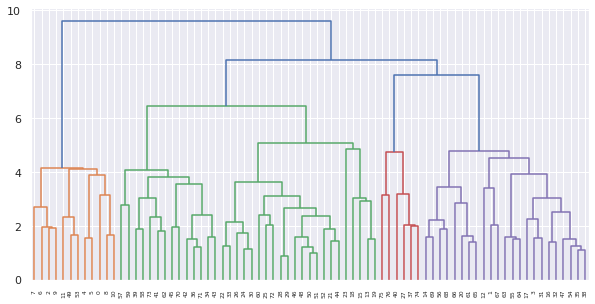

In [16]:
fig=plt.figure(figsize=(10,5))
link=linkage(df_scaled,method='complete')
dendro=dendrogram(link)

In [17]:
from sklearn.cluster import AgglomerativeClustering

In [19]:
hc=AgglomerativeClustering(n_clusters=5,linkage='complete')
hc.fit(df_scaled)

AgglomerativeClustering(linkage='complete', n_clusters=5)

In [21]:
hc.labels_

array([3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 0, 4, 2, 4, 1, 2, 4, 1, 4, 4, 4,
       0, 4, 0, 2, 0, 3, 0, 0, 0, 3, 2, 2, 2, 4, 4, 4, 0, 2, 4, 2, 2, 2,
       2, 2, 2, 2, 4, 4, 0, 4, 1, 1, 1])

In [22]:
df_scaled['cluster']=hc.labels_

In [23]:
df_scaled

,assault_3_&_related_offenses,criminal_mischief_&_related_of,dangerous_drugs,felony_assault,grand_larceny,harrassment_2,miscellaneous_penal_law,off._agnst_pub_ord_sensblty_&,petit_larceny,robbery,cluster
ADDR_PCT_CD,,,,,,,,,,,
1.0,-1.769627,-1.848631,-0.465030,-1.640554,1.482863,-1.210202,-1.375525,1.161788,2.298396,-2.019062,3
5.0,-0.350660,-0.859256,-0.555377,0.303081,1.000618,-1.009768,-0.373630,-1.480392,0.965852,-0.399129,2
6.0,-0.912465,-1.657186,-0.341117,-1.049780,2.332003,-1.707208,-1.266258,-1.756760,1.485719,-0.617419,3
7.0,0.655259,0.302514,0.804196,-0.601945,-0.006138,-0.007575,-0.294899,-0.310603,-0.511687,-0.138799,2
9.0,-0.350534,-1.471704,0.813312,-0.587357,1.395447,-1.468496,-0.680153,-0.834014,0.578987,-0.343071,3
...,...,...,...,...,...,...,...,...,...,...,...
115.0,1.725858,-0.948163,-0.218406,0.793737,0.042710,-0.327262,0.010998,-0.048150,-0.685241,1.750590,0
120.0,0.827456,0.936922,-0.306507,-0.095874,-1.080362,1.996360,0.252395,0.695883,-0.861857,-0.458091,4
121.0,-0.809827,-0.561626,-0.453203,-0.613599,-0.823752,1.640264,-0.002094,1.875556,0.733007,-1.328893,1


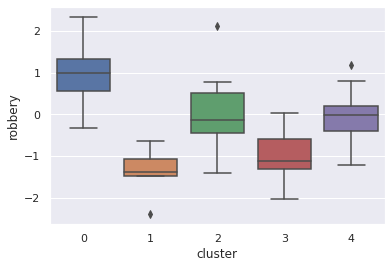

In [24]:
sns.boxplot(data=df_scaled,x='cluster',y='robbery')

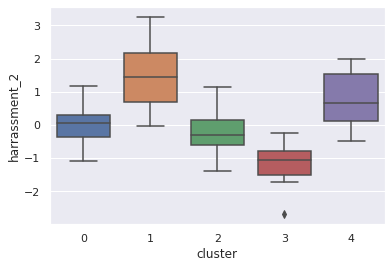

In [26]:
sns.boxplot(data=df_scaled,x='cluster',y='harrassment_2')